<h1>Name : KONYALA ANISH REDDY<br>Roll No : 2021BCS0099</h1>
<h1><b>AGE AND GENDER DETECTION</b></h1>


The objective of gender and age detection is to determine the gender and approximate age of individuals. This information is used for targeted advertising, personalized user experiences, demographic analysis, security, healthcare applications, and audience measurement in various domains.

<h5><u>About Dataset:</u></h5>UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.<br><br><u>Link:</u> https://www.kaggle.com/datasets/jangedoo/utkface-new/  <br>Download the dataset from the link and unzip it and paste it it the place mentioned in the code below

<h5><u>Novelty:</u></h5>The use of a neural network with separate branches for predicting gender and age simultaneously, a common approach in multi-task learning.Showing the age distribution within the dataset and displaying a grid of sample images with labels.

<h5><u>BaseWork:</u></h5>1.Gathering a dataset of facial images with age and gender labels.<br>2.Extracting labels, organize data, and visualize dataset characteristics.<br>3.Designing a neural network with separate branches for age and gender.<br>4.Compiling and training the model on preprocessed data and Visualizing training curves and assess model performance.

<h5><u>Complexity:</u></h5>1.Large and diverse datasets.
<br>2.Sophisticated CNN architecture.
<br>3.Multi-task learning (gender and age).
<br>4.In-depth hyperparameter tuning.

<h5><u>Applications:</u></h5>1.Content Recommendation Systems<br>2.Social Media Analytics<br>3.Entertainment Industry<br>4.Public Services

In [1]:
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np 
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings ('ignore')
%matplotlib inline

In [5]:
BASE_DIR= "D:/CSE-311/project/archive/UTKFace" #paste the path of the dataset here
age_labels = []
gender_labels = []
image_paths = []
image_filenames = os.listdir (BASE_DIR)
random.shuffle (image_filenames)
for image in tqdm(image_filenames):
    image_path = os. path.join (BASE_DIR, image)
    img_components = image.split('_')
    age_label = int(img_components[0])
    gender_label = int(img_components[1])
    age_labels.append (age_label)
    gender_labels.append(gender_label)
    image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

Above code block:<br>
1.Defines the dataset directory<br>
2.Initializes lists for age labels, gender labels, and image paths.<br>
3.Lists image filenames from the dataset directory, shuffles them randomly.<br>
4.Iterates through each image, extracts age and gender labels from filenames, and constructs full image paths.<br>
5.Appends age labels, gender labels, and image paths to their respective lists.

In [6]:
print (f'Number of age_labels: {len (age_labels)}, Number of gender_labels: {len (gender_labels)}, Number of image_paths: {len (image_paths)}')

Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [7]:
gender_mapping = {
1: 'Female',
0: 'Male'
} 

The gender_mapping dictionary is created to map numerical gender labels to corresponding string labels for better human-readable representation. 

In [8]:
import pandas as pd
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head (10)

,image_path,age,gender
0,D:/CSE-311/project/archive/UTKFace\60_1_3_2017...,60,1
1,D:/CSE-311/project/archive/UTKFace\26_0_3_2017...,26,0
2,D:/CSE-311/project/archive/UTKFace\30_0_1_2017...,30,0
3,D:/CSE-311/project/archive/UTKFace\33_0_0_2017...,33,0
4,D:/CSE-311/project/archive/UTKFace\26_1_3_2017...,26,1
5,D:/CSE-311/project/archive/UTKFace\46_0_0_2017...,46,0
6,D:/CSE-311/project/archive/UTKFace\23_1_0_2017...,23,1
7,D:/CSE-311/project/archive/UTKFace\65_0_3_2016...,65,0
8,D:/CSE-311/project/archive/UTKFace\26_0_0_2017...,26,0
9,D:/CSE-311/project/archive/UTKFace\60_0_0_2017...,60,0


df = pd.DataFrame(): Initializes an empty DataFrame named df.

df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels: Adds three columns to the DataFrame:

'image_path': Contains the paths to the images.<br>
'age': Contains the age labels.<br>
'gender': Contains the gender labels.

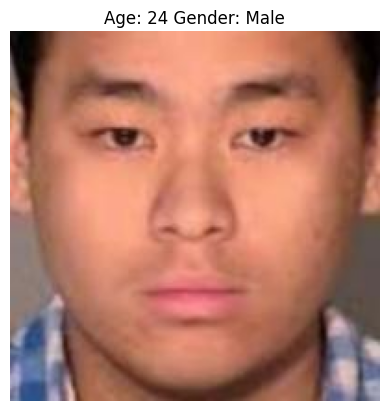

In [11]:
from PIL import Image
rand_index = random.randint (0, len(image_paths))
age = df['age'] [rand_index] 
gender = df['gender' ][rand_index]
IMG= Image.open(df['image_path' ] [rand_index])
plt.title (f'Age: {age} Gender: {gender_mapping [gender]}')
plt.axis ('off')
plt.imshow (IMG)

The above code block involves random selection of an image from the dataset, opening it using the PIL (Python Imaging Library) module, and displaying the image with associated age and gender information.<br>
rand_index = random.randint(0, len(image_paths)): Generates a random index within the range of available image paths.

age = df['age'][rand_index]: Retrieves the age label corresponding to the randomly selected index.

gender = df['gender'][rand_index]: Retrieves the gender label corresponding to the randomly selected index.

IMG = Image.open(df['image_path'][rand_index]): Opens the image file associated with the randomly selected index using PIL's Image.open() method.

plt.title(f'Age: {age} Gender: {gender_mapping[gender]}'): Sets the title of the plot with the age and gender information.

plt.axis('off'): Turns off the axis for better visualization.

plt.imshow(IMG): Displays the image using Matplotlib's imshow() function.

<Axes: xlabel='age', ylabel='Density'>

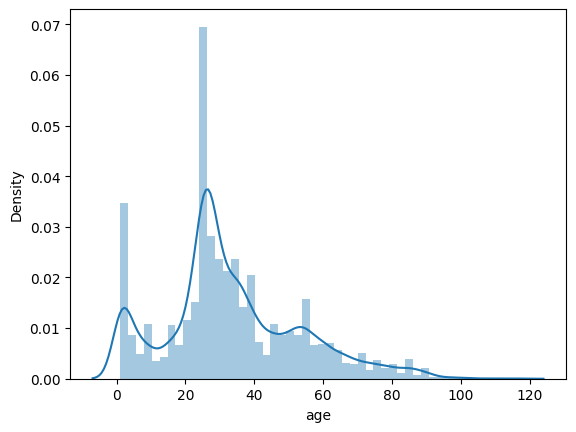

In [12]:
# Age distribution
sns.distplot(df['age'])

The above code block utilizes the Seaborn library to create a distribution plot (histogram) for visualizing the age distribution in the dataset. 

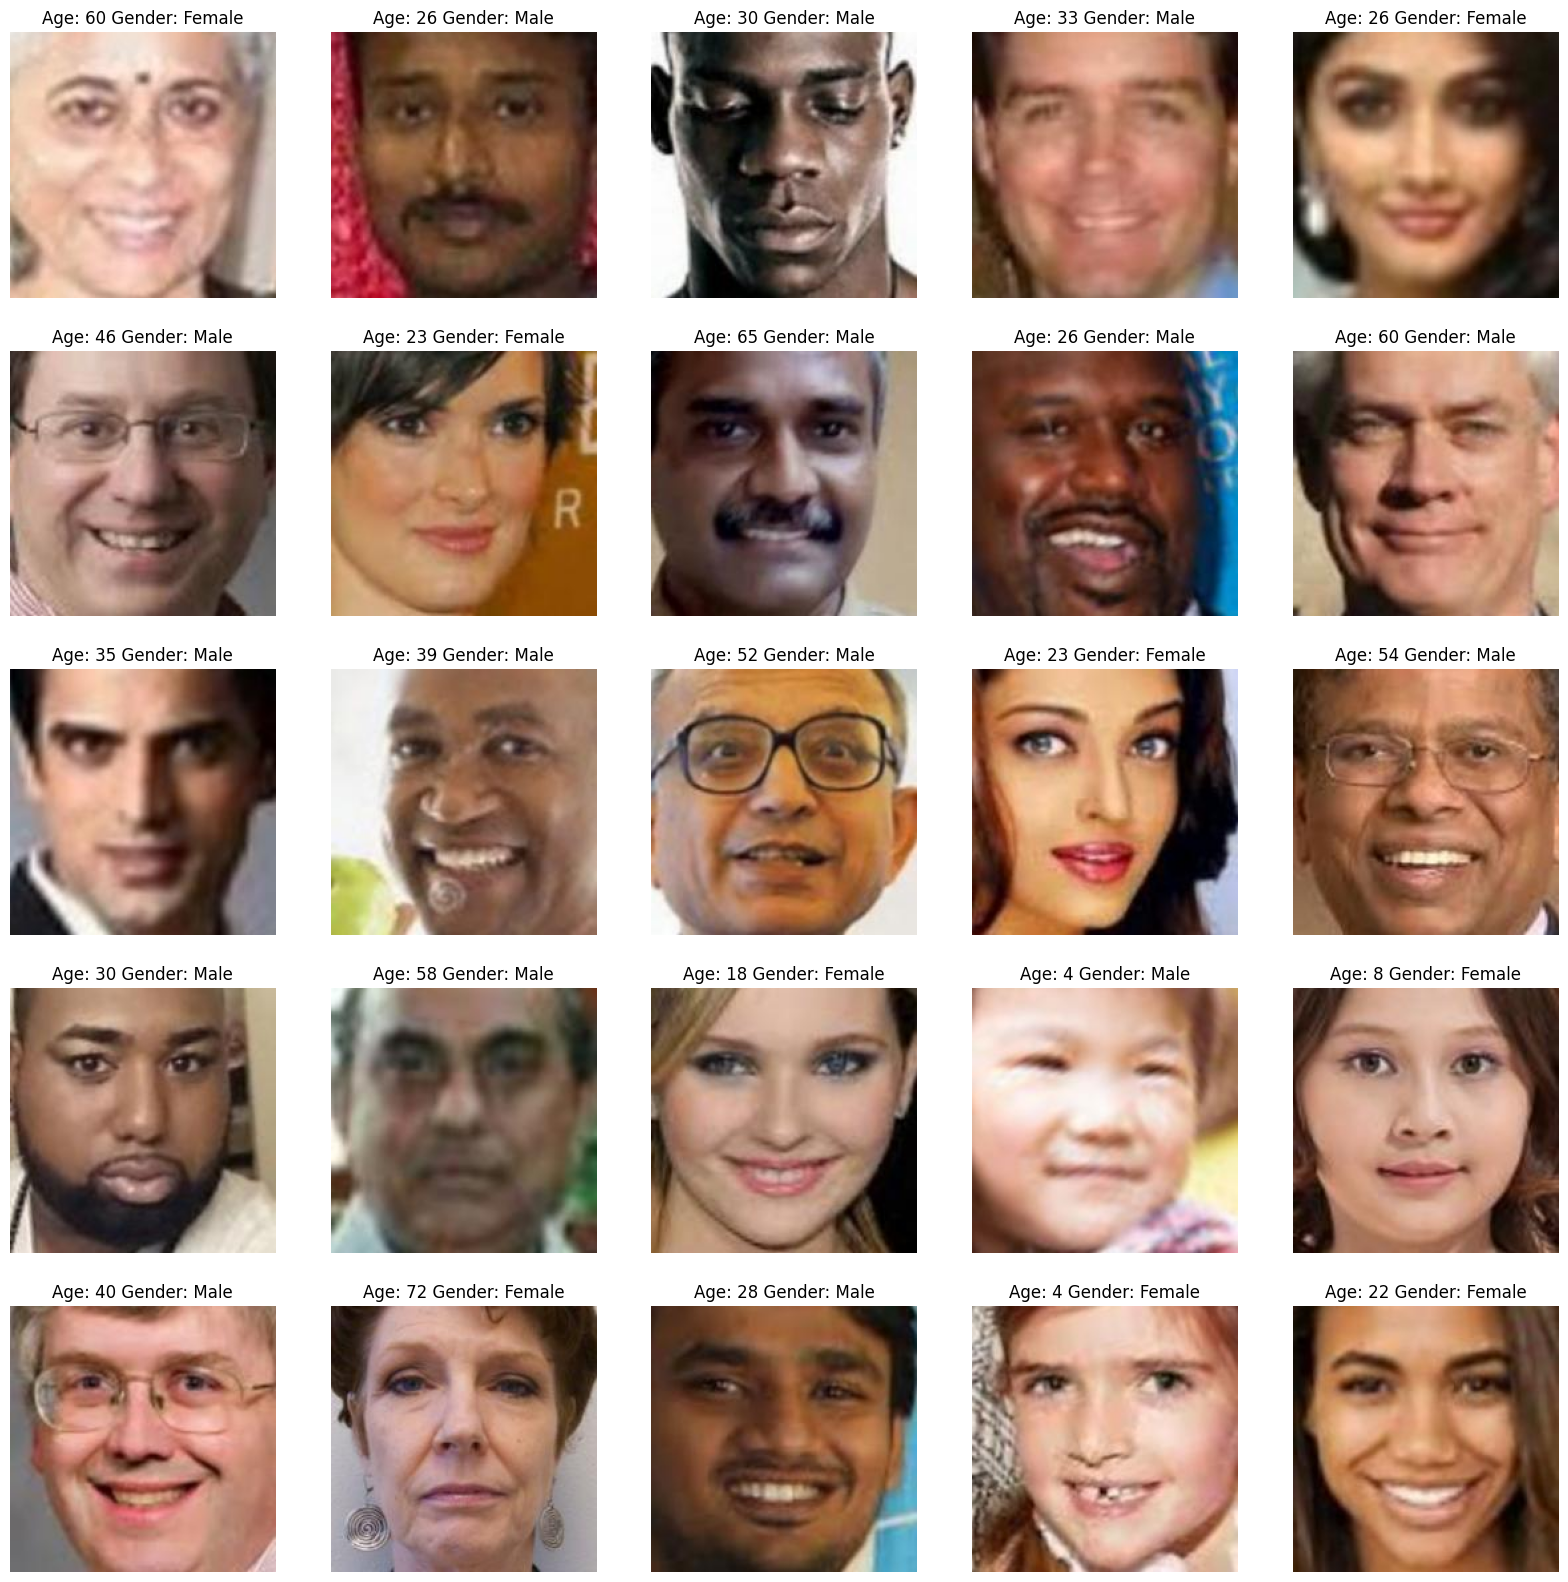

In [13]:
plt.figure (figsize=(20, 20))
samples = df.iloc [0:25]
for index, sample, age, gender in samples.itertuples ():
    plt.subplot (5, 5, index + 1)
    img =load_img(sample)
    img = np.array(img)
    plt.axis ('off')
    plt.title (f'Age: {age} Gender: {gender_mapping [gender]}')
    plt.imshow(img)

This code snippet creates a grid of subplots to display a selection of images from the dataset along with their associated age and gender information. <br>plt.figure(figsize=(20, 20)): Creates a new figure with a specified size (20 by 20 inches) for better visualization.

samples = df.iloc[0:25]: Selects a subset of 25 samples from the DataFrame df for display.

for index, sample, age, gender in samples.itertuples():: Iterates through the selected samples using the itertuples() method.

plt.subplot(5, 5, index + 1): Creates subplots in a 5x5 grid, and index + 1 is used to set the current subplot position.

img = load_img(sample): Loads the image using a function load_img(). The exact implementation of load_img is not provided in the code snippet.

img = np.array(img): Converts the image to a NumPy array.

plt.axis('off'): Turns off the axis for a cleaner display.

plt.title(f'Age: {age} Gender: {gender_mapping[gender]}'): Sets the title of each subplot with the associated age and gender information.

plt.imshow(img): Displays the image in the subplot.


In [14]:
def extract_image_features(images):
    features = list ()
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features= features. reshape (len (features), 128, 128, 1)
    return features

This function, named extract_image_features, is designed to preprocess a list of images for use in a machine learning model. <br>features = list(): Initializes an empty list named features to store the preprocessed image data.

for image in tqdm(images):: Iterates through each image path in the provided list using the tqdm library to display a progress bar.

img = load_img(image, grayscale=True): Loads the image in grayscale using a function load_img. The exact implementation of load_img is not provided in the code snippet.

img = img.resize((128, 128), Image.ANTIALIAS): Resizes the image to a fixed size of 128x128 pixels using the ANTIALIAS resampling method.

img = np.array(img): Converts the image to a NumPy array.

features.append(img): Appends the processed image to the features list.

features = np.array(features): Converts the list of images to a NumPy array.

features = features.reshape(len(features), 128, 128, 1): Reshapes the array to have dimensions suitable for input to a convolutional neural network (CNN). The shape is set to (number of images, height, width, channels), where channels is 1 for grayscale.

In [15]:
x = extract_image_features (df [ 'image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [16]:
x.shape

(23708, 128, 128, 1)

shape is (n, h, w, c):<br>
n: Number of images in the dataset.<br>
h: Height of each image.<br>
w: Width of each image.<br>
c: Number of channels (1 for grayscale images, 3 for RGB).

In [17]:
x=x/255.0

Each element in the array is divided by 255.0. Since pixel values in typical images range from 0 to 255, dividing by 255.0 scales the pixel values to a range between 0 and 1.

In [18]:
y_gender=np.array(df['gender'])
y_age=np.array(df['age'])

In [1]:
input_shape=(128,128,1)

the model expects grayscale images with a resolution of 128x128 pixels.

In [2]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model


inputs = Input(shape=input_shape)
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
flatten = Flatten()(max_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)
dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

# Output layers
output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])


This code defines a convolutional neural network (CNN) model for gender and age prediction.
<br>
Input(shape=input_shape): Defines the input layer with the specified input shape.

Convolutional Layers:

Conv2D: Applies convolutional operations with 32, 64, 128, and 256 filters of size (3, 3) using ReLU activation.<br>
MaxPooling2D: Performs max pooling with a pool size of (2, 2) after each convolutional layer.<br>The MaxPooling2D layer is a downsampling operation commonly used in convolutional neural networks (CNNs). It is applied to reduce the spatial dimensions of the input volume, leading to a reduction in the number of parameters and computational complexity<br>
Flatten(): Flattens the output from the last convolutional layer to prepare for the fully connected layers.
The Flatten layer in a neural network is used to convert the multi-dimensional input data into a one-dimensional array.<br>

Fully Connected Layers:

Two fully connected (dense) layers with 256 units and ReLU activation.<br>
Two dropout layers with a dropout rate of 0.3 to prevent overfitting.<br>The Dropout layer is a regularization technique commonly used in neural networks to prevent overfitting. Overfitting occurs when a model learns to perform well on the training data but fails to generalize to new, unseen data.<br>

Output Layers:

Dense(1, activation='sigmoid', name='gender_out'): Produces the gender prediction using sigmoid activation.
Dense(1, activation='relu', name='age_out'): Produces the age prediction using ReLU activation.<br>
Model(inputs=[inputs], outputs=[output_1, output_2]): Defines the overall model with specified input and output layers.<br>

model.compile(...): Compiles the model with binary crossentropy loss for gender prediction, mean absolute error (mae) loss for age prediction, the Adam optimizer, and accuracy metrics.



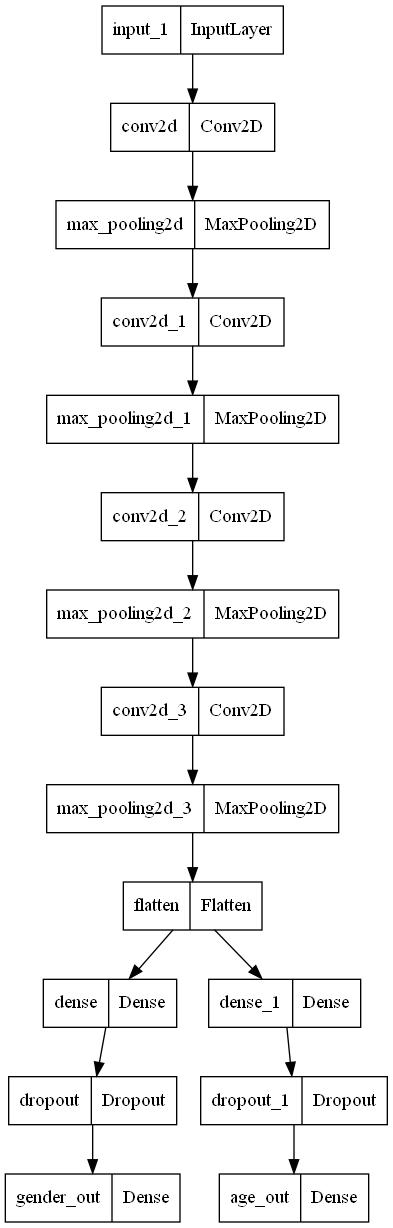

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history=model.fit(x=x,y=[y_gender,y_age],batch_size=32,
                  epochs=5,validation_split=0.2)

Epoch 1/5
593/593 [==============================] - 413s 691ms/step - loss: 16.4328 - gender_out_loss: 0.6987 - age_out_loss: 15.7341 - gender_out_accuracy: 0.5221 - age_out_accuracy: 0.0474 - val_loss: 14.4506 - val_gender_out_loss: 0.6539 - val_age_out_loss: 13.7967 - val_gender_out_accuracy: 0.6786 - val_age_out_accuracy: 0.0470
Epoch 2/5
593/593 [==============================] - 436s 735ms/step - loss: 12.0384 - gender_out_loss: 0.5098 - age_out_loss: 11.5286 - gender_out_accuracy: 0.7500 - age_out_accuracy: 0.0297 - val_loss: 9.9015 - val_gender_out_loss: 0.4147 - val_age_out_loss: 9.4868 - val_gender_out_accuracy: 0.8070 - val_age_out_accuracy: 0.0110
Epoch 3/5
593/593 [==============================] - 399s 673ms/step - loss: 9.7335 - gender_out_loss: 0.4038 - age_out_loss: 9.3297 - gender_out_accuracy: 0.8137 - age_out_accuracy: 0.0115 - val_loss: 8.4098 - val_gender_out_loss: 0.3561 - val_age_out_loss: 8.0537 - val_gender_out_accuracy: 0.8387 - val_age_out_accuracy: 0.0059
E

It is training the neural network model using the provided data. Let's break down the components of this code:<br>batch_size=32: The number of samples per gradient update. This parameter determines how many samples are processed before updating the model's weights.

epochs=5: The number of times the entire training dataset is passed forward and backward through the neural network. In this case, the training process will iterate over the entire dataset five times.

validation_split=0.2: This parameter splits a fraction (20%) of the training data to be used as validation data during training. The model's performance on the validation set is monitored to assess generalization.

history: The fit method returns a History object, which contains information about the training process, such as loss and accuracy on the training and validation sets.

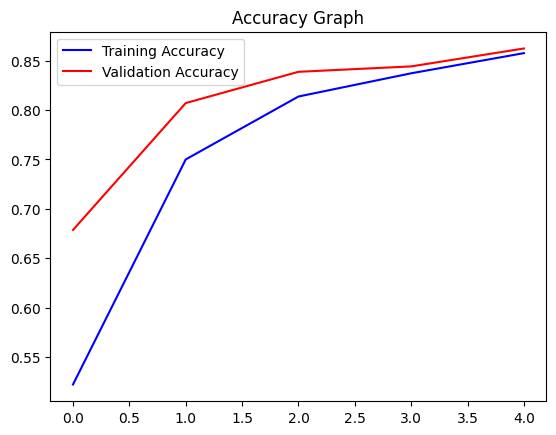

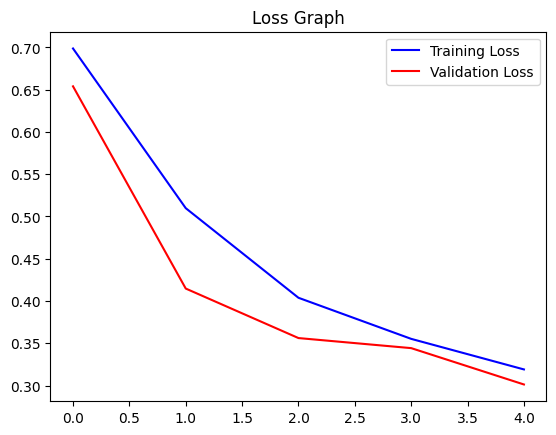

In [ ]:
#plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range (len (acc))
plt.plot( epochs, acc, 'b', label='Training Accuracy')
plt.plot (epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot (epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

This code snippet is creating plots to visualize the training and validation accuracy as well as the training and validation loss for the gender prediction part of the model. <br>

In [ ]:
def get_image_features (image):
    img = load_img(image, grayscale=True)
    img = img.resize((128, 128), Image.ANTIALIAS)
    img = np.array(img)
    img = img.reshape(1, 128, 128, 1)
    img = img/255.0
    return img

load_img(image, grayscale=True): Loads the image file specified by the image parameter. The grayscale=True argument indicates that the image should be loaded in grayscale mode.

img.resize((128, 128), Image.ANTIALIAS): Resizes the image to a fixed size of 128x128 pixels using antialiasing for smooth resizing.

np.array(img): Converts the image to a NumPy array.

img.reshape(1, 128, 128, 1): Reshapes the NumPy array to match the expected input shape for the model. This is necessary because the model expects input in the shape (batch_size, height, width, channels), and in this case, batch_size is set to 1.

img / 255.0: Normalizes the pixel values to be in the range [0, 1] by dividing each pixel value by 255.

1/1 [==============================] - 0s 35ms/step


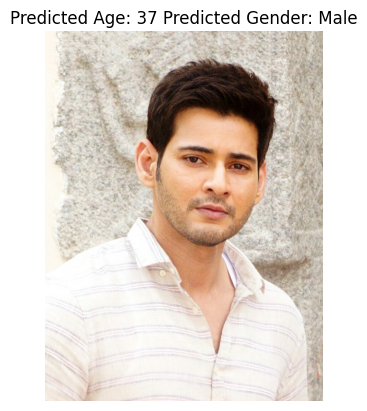

In [43]:
img_to_test = "D:/CSE-311/project/test.jpg" #paste the path of the testing image here
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round (pred[1][0][0])
plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt. axis ('off')
plt.imshow (np.array(load_img(img_to_test)))

This code snippet uses the previously defined get_image_features function to preprocess a test image and then makes predictions using the trained neural network model. <br>

1/1 [==============================] - 0s 36ms/step


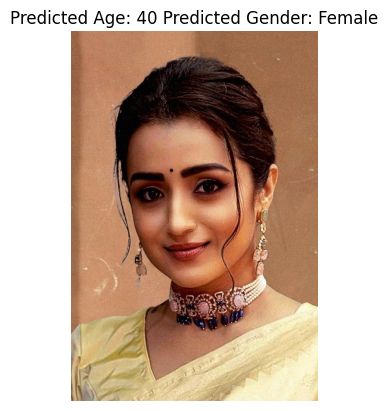

In [44]:
img_to_test = "D:/CSE-311/project/test1.jpg" #paste the path of the testing image here
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round (pred[1][0][0])
plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt. axis ('off')
plt.imshow (np.array(load_img(img_to_test)))